In [15]:
import pandas as pd

df = pd.read_csv("df_final5.csv", sep=";")
print(df.head())
print(df.columns)


     ciudad   pm25   no2  ingresos
0   vitoria   8.31  3.69    1208.0
1  alicante   9.00  0.50    1211.0
2   almeria  14.00  6.40     791.0
3    oviedo   5.00  9.20    1463.0
4     avila    NaN  0.50    1352.0
Index(['ciudad', 'pm25', 'no2', 'ingresos'], dtype='object')


In [16]:
df.columns = df.columns.str.strip().str.lower()


In [17]:
df["pm25"] = pd.to_numeric(df["pm25"], errors="coerce")
df["no2"] = pd.to_numeric(df["no2"], errors="coerce")
df["ingresos"] = pd.to_numeric(df["ingresos"], errors="coerce")

df = df.dropna()


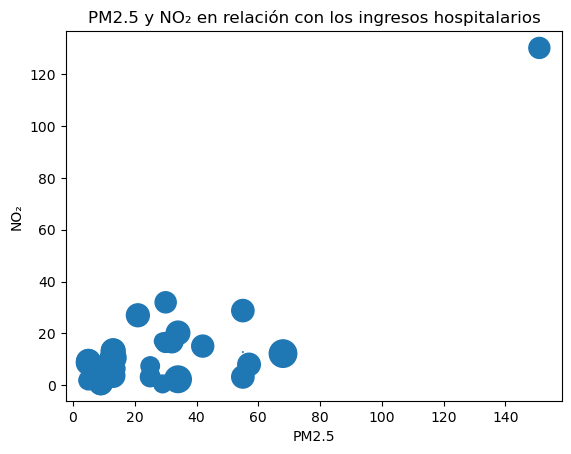

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    df["pm25"],
    df["no2"],
    s=df["ingresos"] / 5
)
plt.xlabel("PM2.5")
plt.ylabel("NO₂")
plt.title("PM2.5 y NO₂ en relación con los ingresos hospitalarios")
plt.show()


**MATRIZ DE CORRELACIÓN**

In [21]:
corr = df[["pm25", "no2", "ingresos"]].corr()
print(corr)


              pm25       no2  ingresos
pm25      1.000000  0.803326  0.014664
no2       0.803326  1.000000  0.034709
ingresos  0.014664  0.034709  1.000000


In [22]:
df[["pm25", "no2", "ingresos"]].corr(method="spearman")


,pm25,no2,ingresos
pm25,1.000000,0.432239,-0.006718
no2,0.432239,1.000000,0.176141
ingresos,-0.006718,0.176141,1.000000


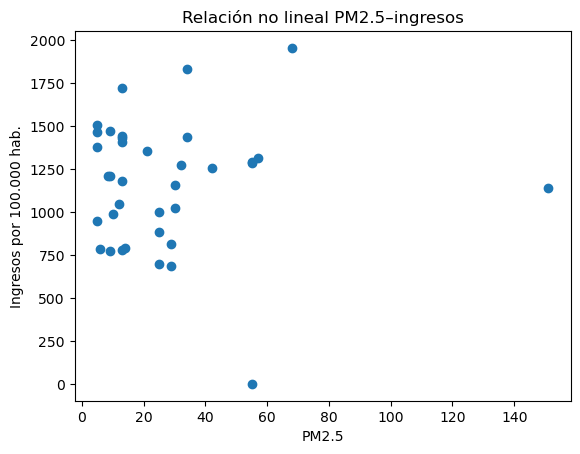

In [23]:
plt.figure()
plt.scatter(df["pm25"], df["ingresos"])
plt.xlabel("PM2.5")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Relación no lineal PM2.5–ingresos")
plt.show()


In [24]:
df["contaminacion"] = (
    (df["pm25"] - df["pm25"].mean()) / df["pm25"].std() +
    (df["no2"] - df["no2"].mean()) / df["no2"].std()
)

df[["contaminacion", "ingresos"]].corr(method="spearman")


,contaminacion,ingresos
contaminacion,1.000000,0.087141
ingresos,0.087141,1.000000


In [25]:
df["pm25_grupo"] = pd.qcut(df["pm25"], 4)

df.groupby("pm25_grupo")["ingresos"].mean()


C:\Users\pspau\AppData\Local\Temp\ipykernel_29568\3700991326.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pm25_grupo")["ingresos"].mean()


pm25_grupo
(4.999, 9.75]    1193.333333
(9.75, 17.5]     1199.555556
(17.5, 32.5]      987.333333
(32.5, 151.0]    1279.593333
Name: ingresos, dtype: float64

C:\Users\pspau\AppData\Local\Temp\ipykernel_29568\689995321.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pm25_bin")["ingresos"].mean().plot(marker="o")


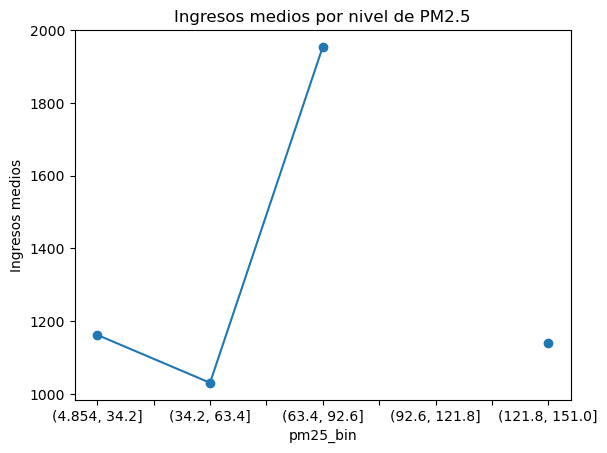

In [26]:
df["pm25_bin"] = pd.cut(df["pm25"], bins=5)
df.groupby("pm25_bin")["ingresos"].mean().plot(marker="o")
plt.ylabel("Ingresos medios")
plt.title("Ingresos medios por nivel de PM2.5")
plt.show()


In [27]:
df_filtrado = df[df["pm25"] < 80]


In [28]:
df[["pm25", "ingresos"]].corr(method="spearman")


,pm25,ingresos
pm25,1.000000,-0.006718
ingresos,-0.006718,1.000000


In [29]:
df[["pm25", "ingresos"]].corr(method="spearman")


,pm25,ingresos
pm25,1.000000,-0.006718
ingresos,-0.006718,1.000000


In [30]:
df["pm25_grupo"] = pd.qcut(df["pm25"], 4)

medias = df.groupby("pm25_grupo")["ingresos"].mean()
print(medias)


pm25_grupo
(4.999, 9.75]    1193.333333
(9.75, 17.5]     1199.555556
(17.5, 32.5]      987.333333
(32.5, 151.0]    1279.593333
Name: ingresos, dtype: float64


C:\Users\pspau\AppData\Local\Temp\ipykernel_29568\2085706510.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = df.groupby("pm25_grupo")["ingresos"].mean()


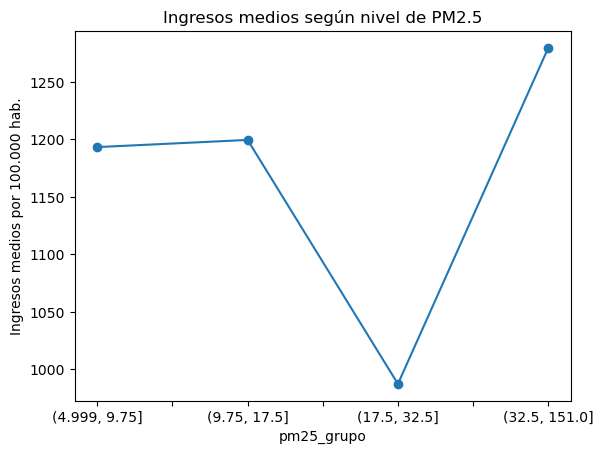

In [31]:
medias.plot(marker="o")
plt.ylabel("Ingresos medios por 100.000 hab.")
plt.title("Ingresos medios según nivel de PM2.5")
plt.show()


In [33]:
df_sin_outliers = df[
    (df["pm25"] < df["pm25"].quantile(0.95)) &
    (df["ingresos"] > df["ingresos"].quantile(0.05))
]

df_sin_outliers[["pm25", "ingresos"]].corr(method="spearman")


,pm25,ingresos
pm25,1.000000,0.016949
ingresos,0.016949,1.000000


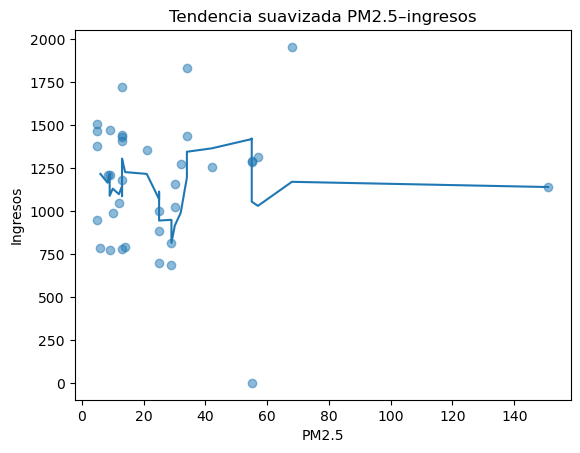

In [34]:
df_ordenado = df.sort_values("pm25")

rolling = df_ordenado["ingresos"].rolling(5).mean()

plt.scatter(df_ordenado["pm25"], df_ordenado["ingresos"], alpha=0.5)
plt.plot(df_ordenado["pm25"], rolling)
plt.xlabel("PM2.5")
plt.ylabel("Ingresos")
plt.title("Tendencia suavizada PM2.5–ingresos")
plt.show()


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("df_final5.csv", sep=";")
df.columns = df.columns.str.strip().str.lower()

df["pm25"] = pd.to_numeric(df["pm25"], errors="coerce")
df["no2"] = pd.to_numeric(df["no2"], errors="coerce")
df["ingresos"] = pd.to_numeric(df["ingresos"], errors="coerce")

df = df.dropna()


<Figure size 640x480 with 0 Axes>

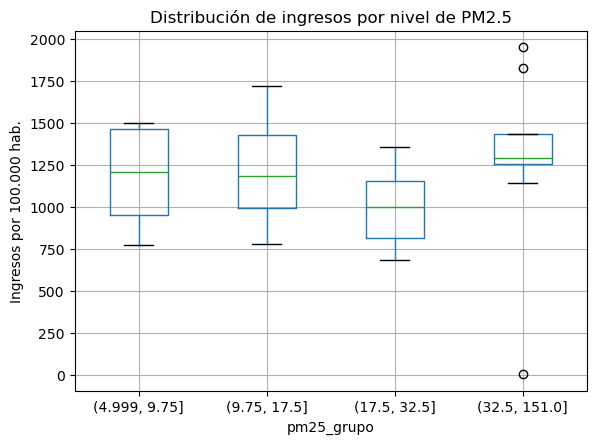

In [39]:
plt.figure()
df.boxplot(column="ingresos", by="pm25_grupo")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Distribución de ingresos por nivel de PM2.5")
plt.suptitle("")
plt.show()


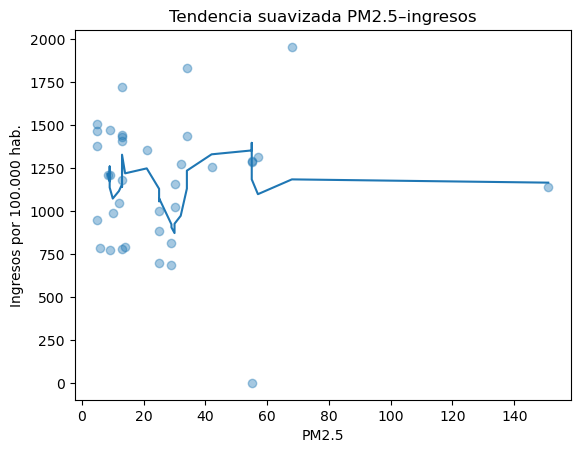

In [40]:
df_ord = df.sort_values("pm25")

rolling = df_ord["ingresos"].rolling(6).mean()

plt.scatter(df_ord["pm25"], df_ord["ingresos"], alpha=0.4)
plt.plot(df_ord["pm25"], rolling)
plt.xlabel("PM2.5")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Tendencia suavizada PM2.5–ingresos")
plt.show()


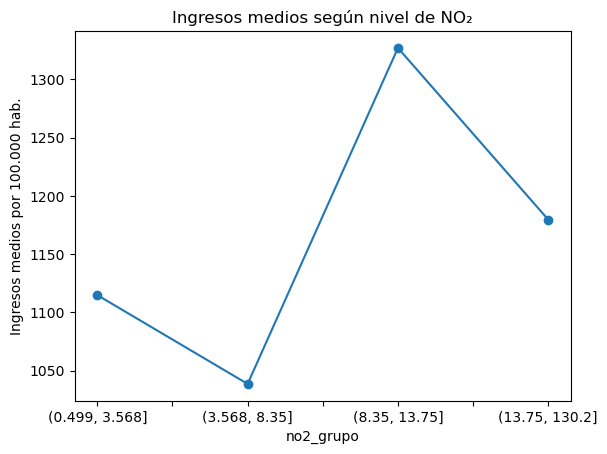

In [41]:
df["no2_grupo"] = pd.qcut(df["no2"], 4)

medias_no2 = df.groupby("no2_grupo", observed=True)["ingresos"].mean()

medias_no2.plot(marker="o")
plt.ylabel("Ingresos medios por 100.000 hab.")
plt.title("Ingresos medios según nivel de NO₂")
plt.show()


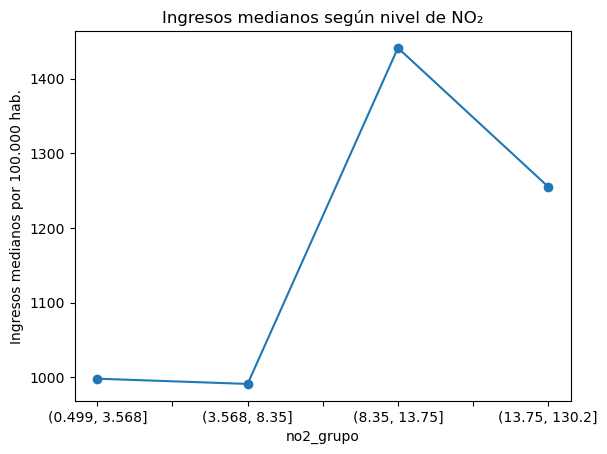

In [42]:
medianas_no2 = df.groupby("no2_grupo", observed=True)["ingresos"].median()

medianas_no2.plot(marker="o")
plt.ylabel("Ingresos medianos por 100.000 hab.")
plt.title("Ingresos medianos según nivel de NO₂")
plt.show()


<Figure size 640x480 with 0 Axes>

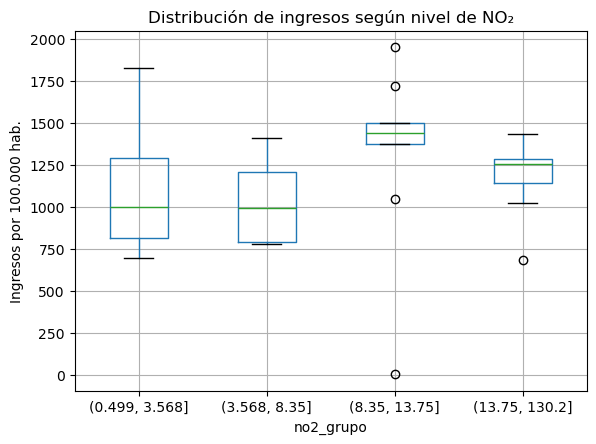

In [43]:
plt.figure()
df.boxplot(column="ingresos", by="no2_grupo")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Distribución de ingresos según nivel de NO₂")
plt.suptitle("")
plt.show()


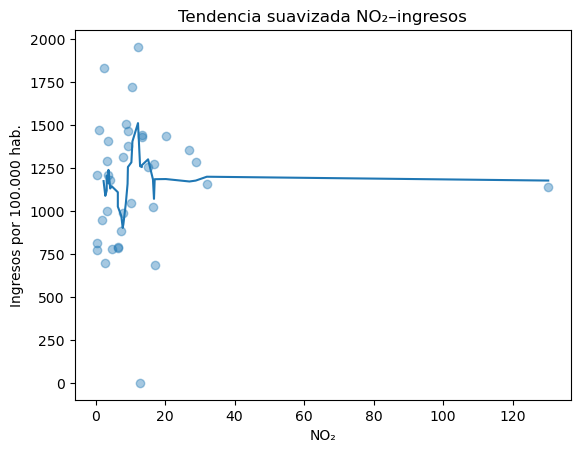

In [44]:
df_ord = df.sort_values("no2")

rolling = df_ord["ingresos"].rolling(6).mean()

plt.scatter(df_ord["no2"], df_ord["ingresos"], alpha=0.4)
plt.plot(df_ord["no2"], rolling)
plt.xlabel("NO₂")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Tendencia suavizada NO₂–ingresos")
plt.show()


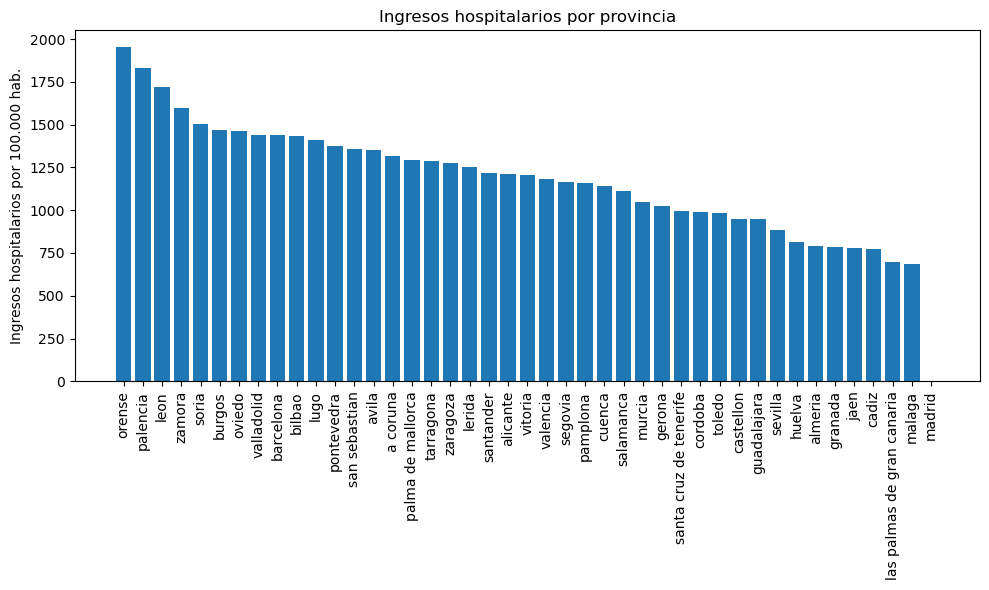

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("df_final5.csv", sep=";")
df.columns = df.columns.str.strip().str.lower()

df["ingresos"] = pd.to_numeric(df["ingresos"], errors="coerce")
df = df.dropna(subset=["ingresos"])

# Ordenar por número de ingresos
df_ord = df.sort_values("ingresos", ascending=False)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_ord["ciudad"], df_ord["ingresos"])
plt.xticks(rotation=90)
plt.ylabel("Ingresos hospitalarios por 100.000 hab.")
plt.title("Ingresos hospitalarios por provincia")
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("df_final5.csv", sep=";")
df.columns = df.columns.str.strip().str.lower()

df["pm25"] = pd.to_numeric(df["pm25"], errors="coerce")
df["no2"] = pd.to_numeric(df["no2"], errors="coerce")
df["ingresos"] = pd.to_numeric(df["ingresos"], errors="coerce")

df = df.dropna()


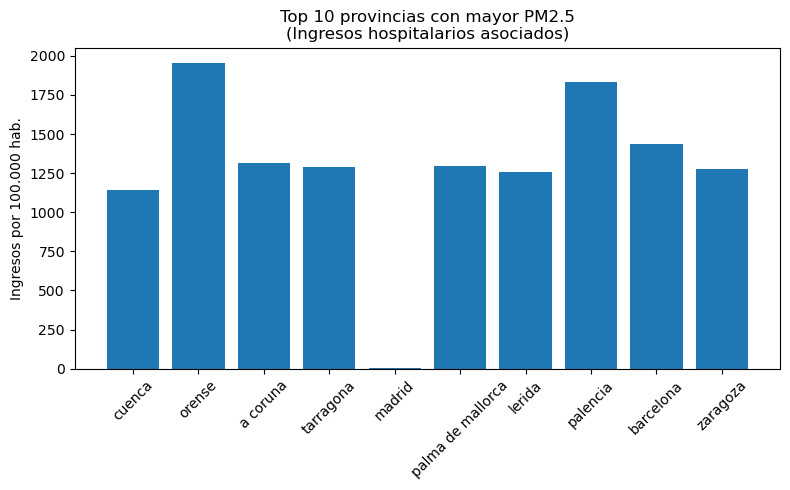

In [48]:
top_pm25 = df.sort_values("pm25", ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.bar(top_pm25["ciudad"], top_pm25["ingresos"])
plt.xticks(rotation=45)
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Top 10 provincias con mayor PM2.5\n(Ingresos hospitalarios asociados)")
plt.tight_layout()
plt.show()


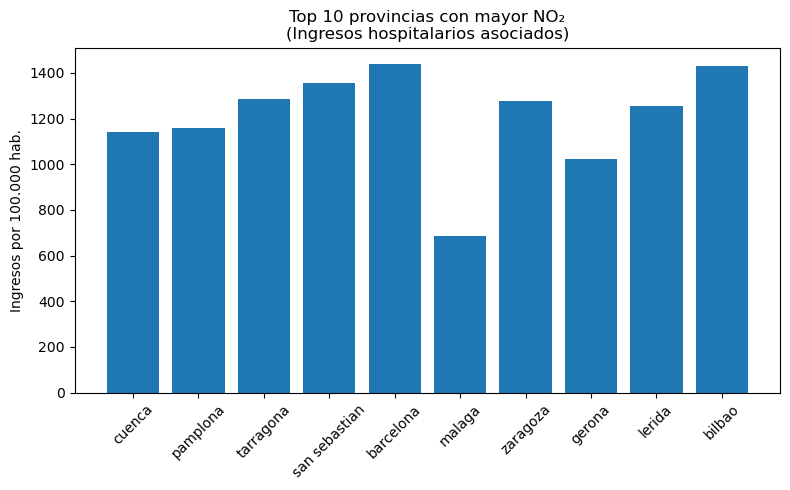

In [49]:
top_no2 = df.sort_values("no2", ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.bar(top_no2["ciudad"], top_no2["ingresos"])
plt.xticks(rotation=45)
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Top 10 provincias con mayor NO₂\n(Ingresos hospitalarios asociados)")
plt.tight_layout()
plt.show()


In [50]:
df["contaminacion_media"] = (df["pm25"] + df["no2"]) / 2


In [51]:
top_cont = df.sort_values("contaminacion_media", ascending=False).head(10)


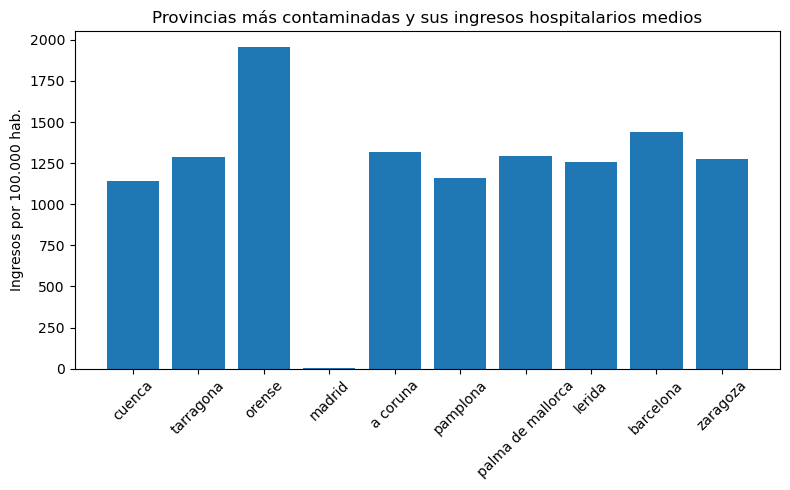

In [52]:
plt.figure(figsize=(8, 5))
plt.bar(top_cont["ciudad"], top_cont["ingresos"])
plt.xticks(rotation=45)
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Provincias más contaminadas y sus ingresos hospitalarios medios")
plt.tight_layout()
plt.show()


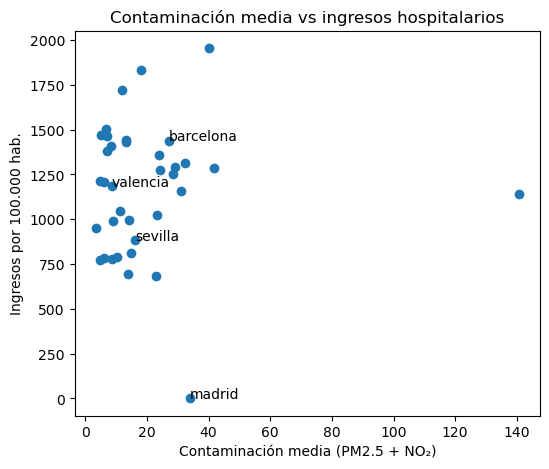

In [53]:
plt.figure(figsize=(6, 5))
plt.scatter(df["contaminacion_media"], df["ingresos"])

for i, prov in enumerate(df["ciudad"]):
    if prov.lower() in ["madrid", "barcelona", "valencia", "sevilla"]:
        plt.annotate(prov,
                     (df["contaminacion_media"].iloc[i],
                      df["ingresos"].iloc[i]))

plt.xlabel("Contaminación media (PM2.5 + NO₂)")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Contaminación media vs ingresos hospitalarios")
plt.show()


In [54]:
resumen = df.sort_values("contaminacion_media", ascending=False)[
    ["ciudad", "pm25", "no2", "ingresos"]
].head(10)

print(resumen)


               ciudad   pm25    no2  ingresos
12             cuenca  151.0  130.2   1141.00
35          tarragona   55.0   28.8   1286.00
27             orense   68.0   12.2   1954.00
23             madrid   55.0   12.8      1.34
11           a coruna   57.0    8.0   1316.00
26           pamplona   30.0   32.0   1157.00
18  palma de mallorca   55.0    3.2   1293.00
21             lerida   42.0   15.1   1255.00
5           barcelona   34.0   20.2   1438.00
42           zaragoza   32.0   16.8   1275.00


In [55]:
df["pm25_n"] = (df["pm25"] - df["pm25"].mean()) / df["pm25"].std()
df["no2_n"] = (df["no2"] - df["no2"].mean()) / df["no2"].std()

df["contaminacion_media"] = (df["pm25_n"] + df["no2_n"]) / 2


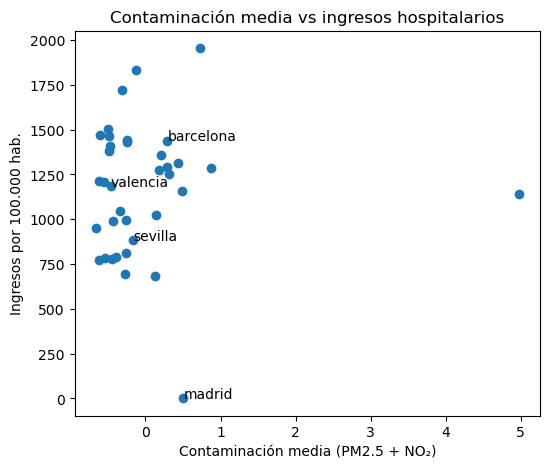

In [56]:
plt.figure(figsize=(6, 5))
plt.scatter(df["contaminacion_media"], df["ingresos"])

for i, prov in enumerate(df["ciudad"]):
    if prov.lower() in ["madrid", "barcelona", "valencia", "sevilla"]:
        plt.annotate(prov,
                     (df["contaminacion_media"].iloc[i],
                      df["ingresos"].iloc[i]))

plt.xlabel("Contaminación media (PM2.5 + NO₂)")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Contaminación media vs ingresos hospitalarios")
plt.show()


In [57]:
df["pm25_n"] = (df["pm25"] - df["pm25"].mean()) / df["pm25"].std()
df["no2_n"] = (df["no2"] - df["no2"].mean()) / df["no2"].std()

df["contaminacion"] = (df["pm25_n"] + df["no2_n"]) / 2


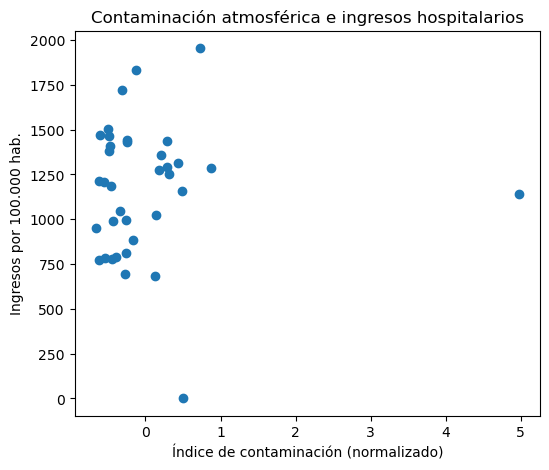

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(df["contaminacion"], df["ingresos"])
plt.xlabel("Índice de contaminación (normalizado)")
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Contaminación atmosférica e ingresos hospitalarios")
plt.show()


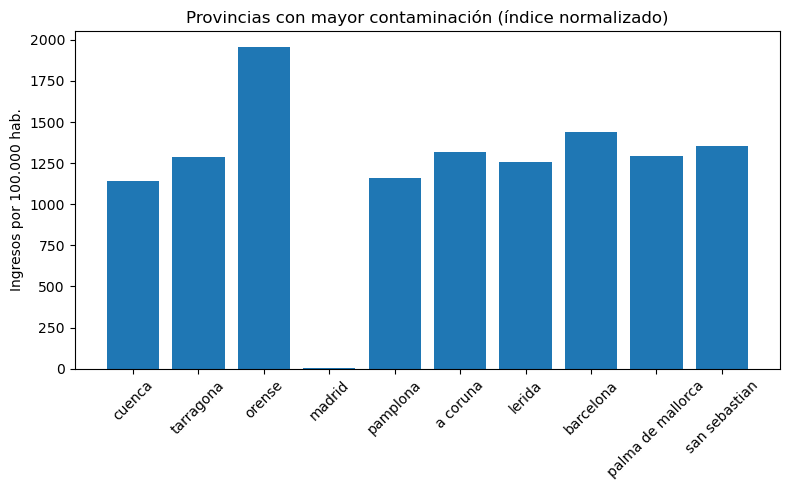

In [59]:
top = df.sort_values("contaminacion", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.bar(top["ciudad"], top["ingresos"])
plt.xticks(rotation=45)
plt.ylabel("Ingresos por 100.000 hab.")
plt.title("Provincias con mayor contaminación (índice normalizado)")
plt.tight_layout()
plt.show()
